Data-
This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize flower from the photo.

Content-
The pictures are divided into five classes: daisy, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

In [1]:
#Importing liberaries
import os # Operating System
import cv2 # OpenCV --> library for image manipulation like change color to black and white, crop, etc
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm import tqdm # Library untuk animasi loading

import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras import layers
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D
from tensorflow.keras.preprocessing import image
from keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img,load_img

loading data from kaggle

In [52]:
!mkdir -p ~/ .kaggle
!cp kaggle.json ~/.kaggle/

In [53]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d alxmamaev/flowers-recognition

flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


Unzipping the data

In [54]:
import zipfile
zip_ref = zipfile.ZipFile('/content/flowers-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

Plotting Image from data

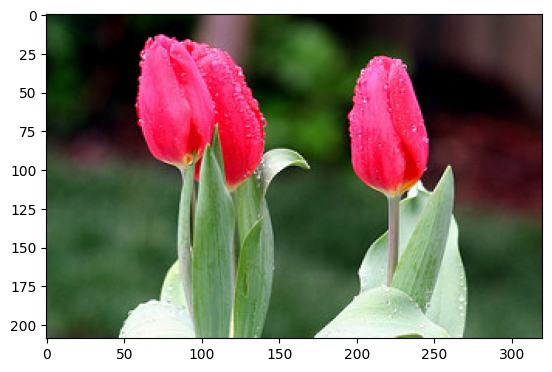

In [56]:
img=plt.imread("/content/flowers/tulip/100930342_92e8746431_n.jpg")
plt.imshow(img)

set image size and batch size

In [60]:
img_size=180
batch_size=32

In [58]:
# data path
data_dir = '/content/flowers'
# Input shape
input_shape = (img_size, img_size, 3)

Create image data generator for data and split into train and validation data

In [61]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size)


Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [62]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [63]:
# Class name
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


Here I am using Sequential model

In [71]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
callback=EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.01,
    mode="auto",
    verbose=1,
    baseline=None,
    restore_best_weights=False,
    patience=2

)

In [68]:
epochs=10
history1 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=callback
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


108/108 [==============================] - 12s 79ms/step - loss: 1.2120 - accuracy: 0.4826 - val_loss: 1.0255 - val_accuracy: 0.5805
Epoch 2/10
108/108 [==============================] - 8s 67ms/step - loss: 0.9220 - accuracy: 0.6407 - val_loss: 0.9188 - val_accuracy: 0.6385
Epoch 3/10
108/108 [==============================] - 9s 80ms/step - loss: 0.7516 - accuracy: 0.7119 - val_loss: 0.9412 - val_accuracy: 0.6454
Epoch 4/10
108/108 [==============================] - 7s 63ms/step - loss: 0.5365 - accuracy: 0.7985 - val_loss: 0.9771 - val_accuracy: 0.6779
Epoch 5/10
108/108 [==============================] - 7s 62ms/step - loss: 0.3338 - accuracy: 0.8787 - val_loss: 1.1856 - val_accuracy: 0.6385
Epoch 6/10
108/108 [==============================] - 8s 63ms/step - loss: 0.1981 - accuracy: 0.9325 - val_loss: 1.3135 - val_accuracy: 0.6779
Epoch 6: early stopping


Evaluating the trained model

In [69]:
model.evaluate(val_ds)

27/27 [==============================] - 2s 61ms/step - loss: 1.3135 - accuracy: 0.6779


[1.3135113716125488, 0.6778678894042969]

Saving the model

In [70]:
model.save('flower.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
